In [1]:
# funciones para graficar
from graficar_STO import *

import numpy as np
from scipy.special import factorial2 # doble factorial
from scipy.special import sph_harm_y as sph_harm # armónicos esféricos

---

In [2]:
def R_STO(n:int, zeta:float, r:float):
    """ Función radial de tipo Slater
    
    n : número cuántico principal
    zeta : exponente oribital de Slater
    r : coordenada radial
    """
    return np.power(2*zeta, 1.5) / np.sqrt(factorial2(2*n)) * np.power(2*zeta*r, n-1) * np.exp(-zeta*r)

In [3]:
def STO(n:int, l:int, m:int, zeta:float, r:float, theta:float, phi:float):
    """ Función de tipo Slater (Slater Type Orbital)
    
    Compuesta de una parte radial y una parte angular.
    
    (n,l,m) : número cuántico (principal, azimutal, magnético)
    zeta : exponente orbital de Slater
    (r,theta,phi) : coordenada (radial, polar, azimutal)
    """
    return R_STO(n, zeta, r) * sph_harm(l, m, phi, theta)

In [4]:
def R_GTO(l:int, alpha:float, r:float):
    """ Función radial de tipo Guassiana
    
    n : número cuántico principal
    alpha : exponente orbital Gaussiano
    r : coordenada radial
    """
    m1 = 2*np.power(2*alpha, 0.75) / np.power(np.pi, 0.25)
    m2 = np.sqrt(np.power(2,l) / factorial2(2*l+1))
    m3 = np.power(np.sqrt(2*alpha)*r, l)
    m4 = np.exp(-alpha*np.power(r,2))
    return m1 * m2 * m3 * m4

In [5]:
def GTO(l:int, m:int, alpha:float, r, theta, phi):
    """ Función de tipo Gaussiana (Gaussian Type Orbital)
    
    Compuesta de una parte radial y una parte angular.
    
    (l,m) : número cuántico (azimutal, magnético)
    alpha : exponente orbital Gaussiano
    (r,theta,phi) : coordenada (radial, polar, azimutal)
    """
    return R_GTO(l, alpha, r) * sph_harm(l, m, phi, theta)

---

In [6]:
def R_STO_nG(z:float, d:np.array, a:np.array, l:int, r:float):
    """ Combinación lineal de Gaussianas (parte radial)
    
    z : exponente orbital de Slater
    d : vector de coeficientes
    a : vector de exponentes orbitales Gaussianos
    l : número cuántico azimutal
    r : coordenada radial
    """
    suma = 0
    # calcular cada uno de los k términos de la combinación lineal
    for i in range(len(d)):
        suma += d[i] * R_GTO(l, np.power(z,2)*a[i], r) # k-ésimo término
    
    return suma

In [7]:
def GTO_nG(z:float, d:np.array, a:np.array, l:int, m:int, r:float, theta, phi):
    return R_STO_nG(z, d, a, l, r) * sph_harm(l, m, phi, theta)

In [8]:
r = np.linspace(0, 4, 100) # coordenada radial
theta = 0 # coordenada polar
phi = 0 # coordenada azimutal

In [9]:
n, l, m = 1,0,0
sph_harm(l, m, phi, theta)

array(0.28209479+0.j)

In [10]:
# Función |1s> de tipo Slater
zeta = 1 # exponente orbital de Slater
chi_STO_1s = np.real(STO(n, l, m, zeta, r, theta, phi))

# Función |1s> de tipo Gaussiano
d = [1]
a = [0.5] # exponente orbital Gaussiano
# chi_GTO_1s = np.real(GTO(l, m, zeta, r, theta, phi))
chi_GTO_1s = np.real(GTO_nG(zeta, d, a, l, m, r, phi, theta))

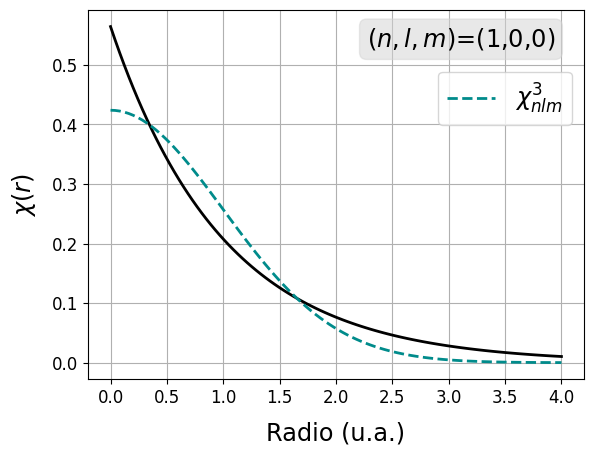

In [11]:
plt.plot(r, chi_STO_1s, color='k', linewidth=2)
plt.plot(r, chi_GTO_1s, label=r'$\chi_{nlm}^3$', linestyle='dashed', linewidth=2, color='darkcyan')

plt.xlabel('Radio (u.a.)', fontsize='xx-large', labelpad=10)
plt.ylabel(r'$\chi(r)$', fontsize='xx-large', labelpad=10)
plt.tick_params(axis='both', labelsize=12)
plt.grid()
plt.legend(fontsize='xx-large', loc='upper right', bbox_to_anchor=(1, 0.865))
plt.text(0.562, 0.90, f'($n,l,m$)=({n},{l},{m})', transform=plt.gca().transAxes, fontsize='xx-large', color='black',
         bbox=dict(facecolor='lightgray', edgecolor='lightgray', boxstyle='round,pad=0.3', alpha=0.5))
# plt.savefig(f"imgs/X117-7.svg", format="svg")
plt.show()

In [45]:
def comparar_funcs(name:str, x:np.ndarray, f, g:list, N:list,
                   labels:list, linestyle:list, linewidth:list,
                   marker:list, markersize:list, color:list,
                   xticks:list, yticks:list):
    """ Gráfica de una función principal f(x) y múltiples funciones gi(x)

    name : nombre del archivo
    x : dominio
    f : función principal
    g : lista de funciones a comparar
    N : [a,b]
        1er conjunto -> se consideran únicamente cada 'a' número de elementos
        2do conjunto -> se consideran únicamente cada 'b' número de elementos
    (labels, linestyle, linewidth) : lista de (etiquetas, estilos de línea, grosor de línea) para las funciones gi(x)
    (marker, markersize, color) : lista de (marcador, tamaño de marcador, color) para las funciones gi(x)
    """
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 fila, 2 columnas, tamaño de figura (15, 5)

    # Comparación función de Slater con Gaussianas
    axs[0].plot(x, f, label='Slater', color='k') # función principal
    for i in range(len(g)): # funciones aproximadas
        xi = x[::N[i]]
        gi = g[i][::N[i]]
        axs[0].plot(xi, gi, label=labels[i], linestyle=linestyle[i], linewidth=linewidth[i], marker=marker[i], markersize=markersize[i], color=color[i])
    axs[0].set_xlabel('Radio (u.a.)', fontsize='xx-large', labelpad=10)
    axs[0].set_ylabel(r'$R_{1s}$', fontsize='xx-large', labelpad=10)
    axs[0].set_xticks(xticks[0])
    axs[0].set_yticks(yticks[0])

    # Comparación de las funciones de distribución radiales de Slater con Gaussianas
    k = 4*np.pi*np.power(x,2)
    axs[1].plot(x, k*np.power(f,2), label='Slater', color='k') # función principal
    for i in range(len(g)): # funciones aproximadas
        xi = x[::N[i]]
        ki = 4*np.pi*np.power(xi,2)
        gi = g[i][::N[i]]
        axs[1].plot(xi, ki*np.power(gi,2), label=labels[i], linestyle=linestyle[i], linewidth=linewidth[i], marker=marker[i], markersize=markersize[i], color=color[i])
    axs[1].set_xlabel('Radio (u.a.)', fontsize='xx-large', labelpad=10)
    axs[1].set_ylabel(r'$4\pi r^2 |R_{1s}|^2$', fontsize='xx-large', labelpad=10)
    axs[1].set_xticks(xticks[1])
    axs[1].set_yticks(yticks[1])

    for ax in axs:
        ax.tick_params(axis='both', which='major', labelsize='xx-large')
        ax.legend(fontsize='xx-large', loc='upper right')
        ax.grid()

    fig.subplots_adjust(wspace=0.25)
    plt.savefig(f"imgs/{name}.svg", format="svg")
    plt.show()

In [46]:
d = np.array([0.1545314772435472, 0.5354555247125108, 0.4443376735387033]) # coeficientes de contracción
a = np.array([2.226695151373135, 0.40545439902953734, 0.10977046334437662]) # exponentes orbitales Gaussianos

# Parámetros obtenidos por Stewart
dSte = [0.154329, 0.535328, 0.444635]
aSte = [2.22766, 0.405771, 0.109818]

In [47]:
N = [1,5]

xdata = np.linspace(0,4,100) # dominio de graficación
ydata = [R_STO_nG(1, dSte, aSte, 0, xdata), R_STO_nG(1, d, a, 0, xdata)]
labels = ['Stewart', 'Este trabajo']
linestyle = ['--', 'None']
linewidth = [2.5, None]
marker = [None, 'o']
markersize = [0, 7]
color = ['blue', 'red']
xticks = [np.arange(0,4.1,0.5), np.arange(0,4.1,0.5)]
yticks = [np.arange(0,2.1,0.25), np.arange(0,7.1,1)]

n, l, m = 1,0,0
z = 1 # exponente orbital de tipo Slater
R_STO_1s = R_STO(1, z, xdata) # función radial de tipo Slater |1s>

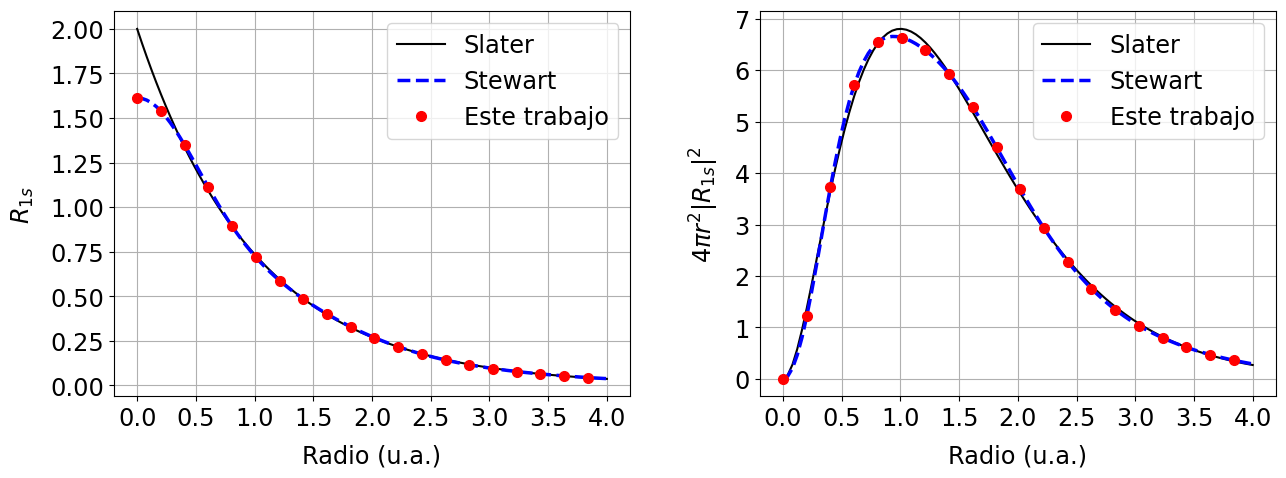

In [48]:
name = 'SSS'
comparar_funcs(name, xdata, R_STO_1s, ydata, N, labels, linestyle, linewidth, marker, markersize, color, xticks, yticks)

In [49]:
d2 = np.array([0.1545314772435472, 0.5354555247125108, 0.4443376735387033])
a2 = np.array([3.423766464751332, 0.6234266839478166, 0.1687830644383135])

dSO = [0.154329, 0.535328, 0.444635]
aSO = [3.42525, 0.623913, 0.168856]

In [54]:
N = [1,5]

xdata = np.linspace(0,4,100) # dominio de graficación
ydata = [R_STO_nG(1, dSO, aSO, 0, xdata), R_STO_nG(1, d2, a2, 0, xdata)]
labels = ['Szabo y Ostlund', 'Este trabajo']
linestyle = ['--', 'None']
linewidth = [2.5, None]
marker = [None, 'o']
markersize = [0, 7]
color = ['purple', 'darkcyan']
xticks = [np.arange(0,4.1,0.5), np.arange(0,4.1,0.5)]
yticks = [np.arange(0,2.7,0.5), np.arange(0,8.5,2)]

n, l, m = 1,0,0
z = 1.24 # exponente orbital de tipo Slater
R_STO_1s = R_STO(1, z, xdata) # función radial de tipo Slater |1s>

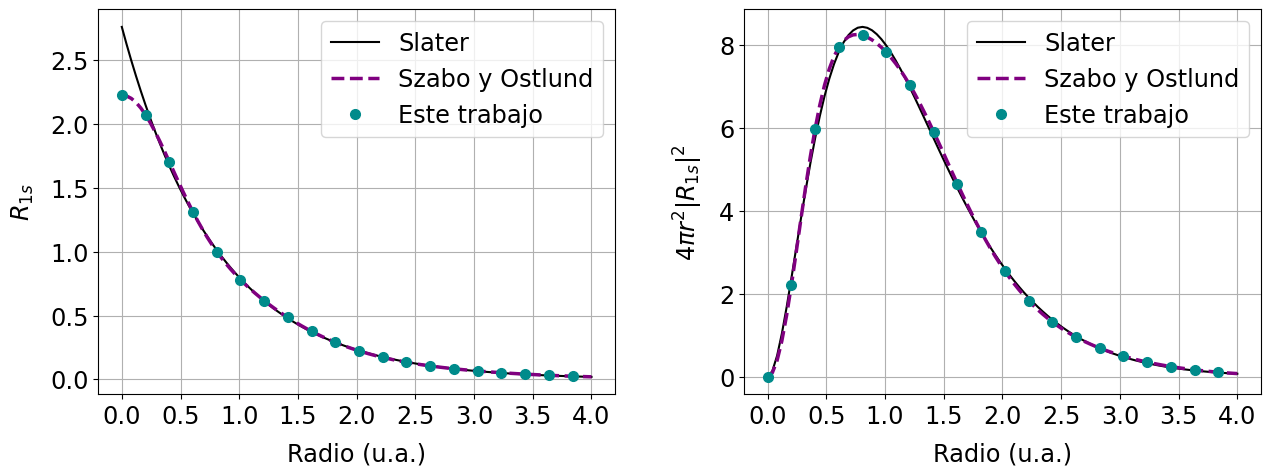

In [55]:
name = 'SSSO'
comparar_funcs(name, xdata, R_STO_1s, ydata, N, labels, linestyle, linewidth, marker, markersize, color, xticks, yticks)